# cmip Impacts by Event Type

This file makes lots of contour plots for rainfall and temperature anomalies under different individal and compound event types



In [1]:
#import my functions
import utils._modelDefinitions as _model
%run helpers/impactPlots.ipynb


In [2]:
import xarray
import numpy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


In [3]:
indexSet='ecCombinedDmiSam'
resultsDir='figures/cmipCompoundImpact'+indexSet.capitalize()+'/'

# Import Data

Import events

In [4]:
allCompounds=xarray.open_dataset('results/cmip6Compounds.nc').sel(experiment='ssp585',drop=True)

Import seasonal impacts

In [5]:
meanXr=xarray.load_dataset('results/cmip6PrTsMeans.nc')

In [6]:
impactXr=xarray.concat(
    [xarray.open_dataset(
                'results/cmipSeasonPrTs/'+iModel+'ssp585.nc'
    ).sel(year=range(1850,2099)) for iModel in _model.scenarioMip[:,1]],
    'model', 
    coords='minimal', 
    compat='override'
).drop('height')

In [7]:
# rainfall is as a percentage of the annual average by cool/warm season

prXr=xarray.Dataset()
prXr['Winter Rain']=(impactXr.prWinter/(meanXr['prWinter']+meanXr['prSummer'])*100)
prXr['Summer Rain']=(impactXr.prSummer/(meanXr['prWinter']+meanXr['prSummer'])*100)

tsXr=(impactXr[['tsWinter','tsSummer']])
tsXr=tsXr.rename({'tsWinter':'Winter Temp','tsSummer':'Summer Temp'})

In [8]:
#temperature gets detrended
trendXr=tsXr.rolling(year=11,min_periods=5,center=True).mean('year')
detrendTsXr=(tsXr-trendXr)

In [9]:
prXr.to_netcdf('results/cmip6PrXr.nc')
detrendTsXr.to_netcdf('results/cmip6DetrendTsXr.nc')

In [12]:
prXr=xarray.open_dataset('results/cmip6PrXr.nc')
detrendTsXr=xarray.open_dataset('results/cmip6DetrendTsXr.nc')


# Define Event Types

#Everything
everythingXr=(compoundsXr.nEvents<5)
everythingXr.name='everything'

#The no firePos event
noEventXr=(compoundsXr.nEvents==0)
noEventXr.name='noFirePos'

#the absence of events
nothingXr=noEventXr.all('fire')
nothingXr.name='no'

#The single index only event
singleEventsXr=(compoundsXr[['enso','iod','sam']]==True)

#The compound events
compoundEventsXr=(compoundsXr[[*allCompounds.pairs, 'all3']]==True)

#Put all those events in one xr
maskXr=xarray.merge([everythingXr, nothingXr, noEventXr,
                     singleEventsXr, compoundEventsXr])

In [13]:
#List of events to plot
eventsList=[#'everything','no',# 'noFirePos', 
            #'enso','iod','sam', 
            *allCompounds.pairs, 'all3']

In [14]:
eventsList

['enso+iod', 'enso+sam', 'iod+sam', 'all3']

# Impact plots for compounds events

Fire:pos
winter


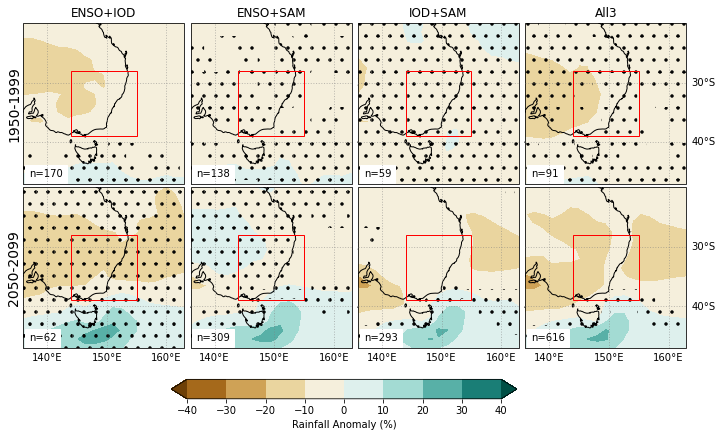

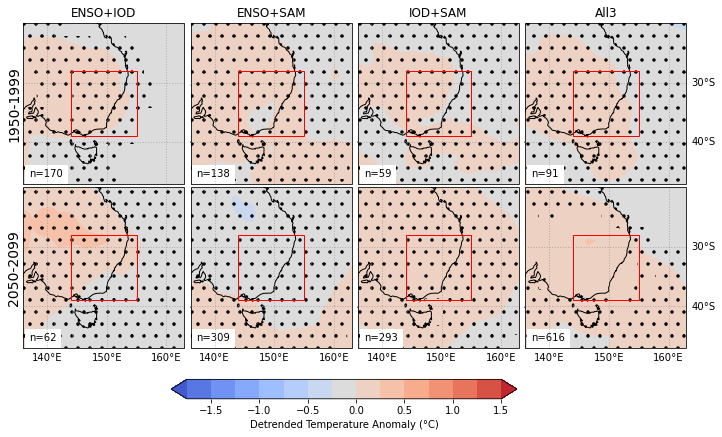

summer


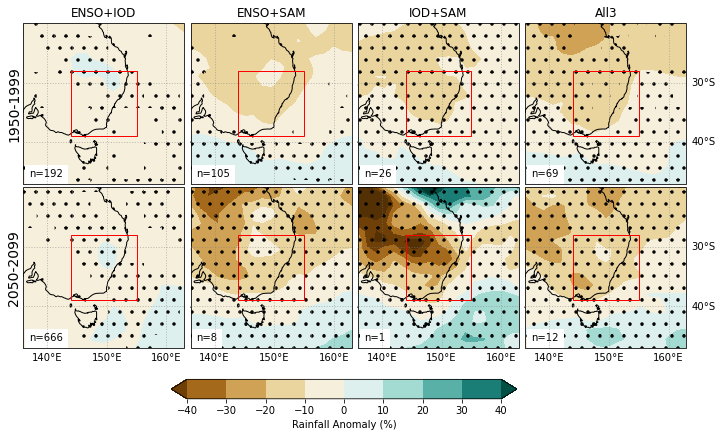

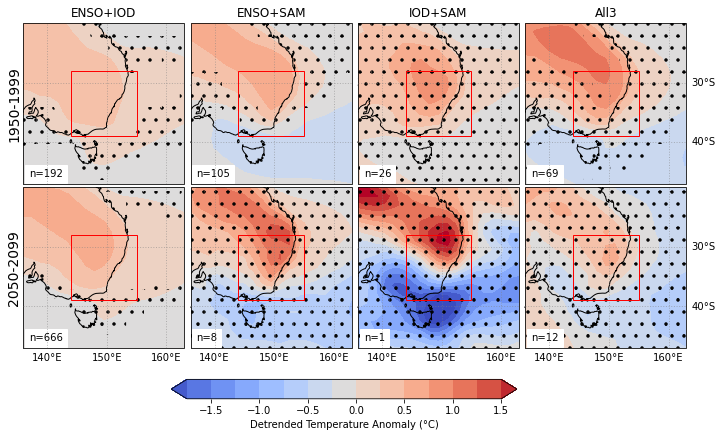

Fire:neg
winter


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


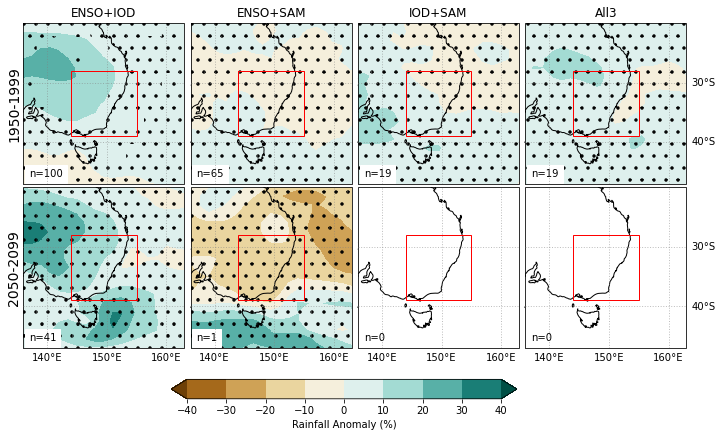

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


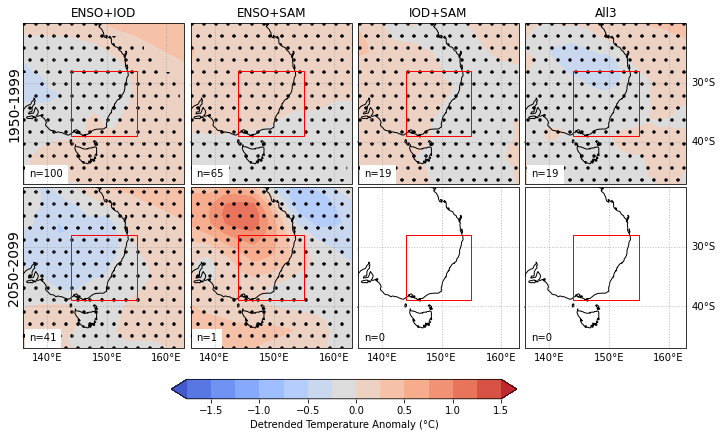

summer


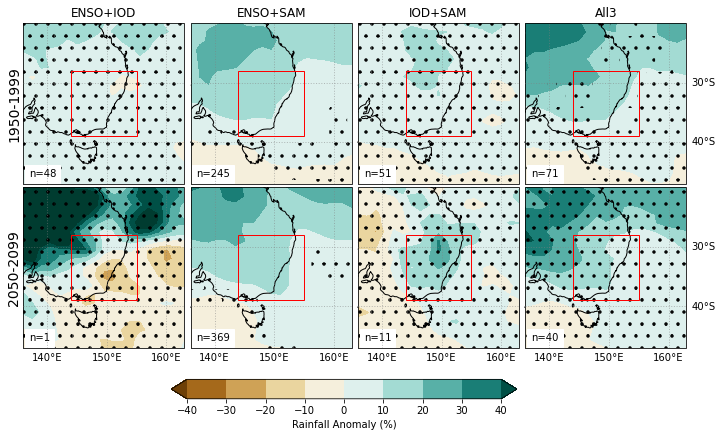

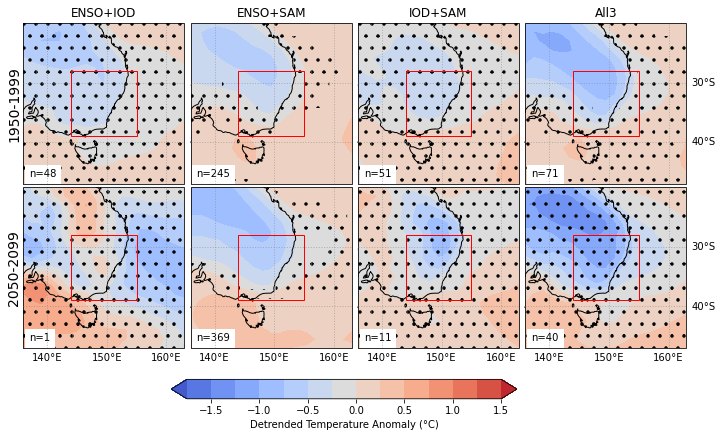

In [16]:
%run helpers/impactPlots.ipynb
for iFire in ['pos','neg']:
    print('Fire:'+iFire)
    for iSeason in ['winter','summer']:
        print(iSeason)
        axs=multiPlotter(
            prXr[iSeason.capitalize()+' Rain'], #sourceData
            allCompounds[indexSet+iSeason].to_dataset('compound').sel(fire=iFire, drop=True), #masks for event types
            eventsList, #names of event types
            cbarLabel='Rainfall Anomaly (%)'
        )
        axs[0].set_title('ENSO+IOD')
        axs[1].set_title('ENSO+SAM')
        axs[2].set_title('IOD+SAM')
        axs[3].set_title('All3')
        plt.savefig(
            'figures/impactPlots/'
            +iFire
            +iSeason.capitalize()
            +indexSet.capitalize()
            +'Rain.pdf',
            bbox_inches='tight'
        )
        plt.show()
        
        axs=multiPlotter(
            detrendTsXr[iSeason.capitalize()+' Temp'],
            allCompounds[indexSet+iSeason].to_dataset('compound').sel(fire=iFire, drop=True), 
            eventsList,
            cbarLabel='Detrended Temperature Anomaly (°C)'
        )
        axs[0].set_title('ENSO+IOD')
        axs[1].set_title('ENSO+SAM')
        axs[2].set_title('IOD+SAM')
        axs[3].set_title('All3')
        plt.savefig(
            'figures/impactPlots/'+iFire+iSeason.capitalize()+indexSet.capitalize()+'Temp.pdf',
            bbox_inches='tight'
        )
        plt.show()

# Now pair them by how the frequencies change

In [22]:
%run helpers/impactPlots.ipynb

In [43]:
def singleAnomWithStipling(da, iComp, iSeason, iImpact='Rain'):
    
    season=iSeason.capitalize() +' '+ iImpact
    
    plotCond = da.sel(compound=iComp,drop=True)
    if iImpact=='Rain':
        toPlot = prXr[season].where(plotCond)
    elif iImpact=='Temp':
        toPlot = detrendTsXr[season].where(plotCond)
    cs, gl=plotAnom(toPlot.mean(['year','model']), ax)
    plotStipling(toPlot.mean('year'),ax)

    plt.xlim([136,163])
    plt.ylim([-47,-20])

    #This is the number of events. Because dataset is well-curated, we can use the count from one position to be the count for everything
    nEvents=(
        toPlot.isel(lon=17,lat=15).count()
        /(50*37)
        *100
    ).values
    ax.text(
        0.035,0.045,
        "n="+f'{nEvents:.0f}'+'%', 
        transform=ax.transAxes, 
        backgroundcolor='white',
        zorder=2
    )
    
    return cs, gl


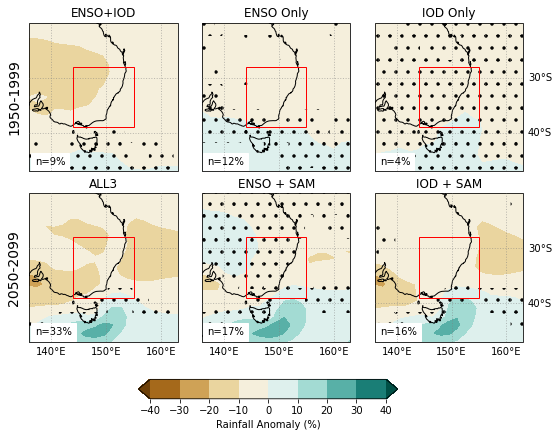

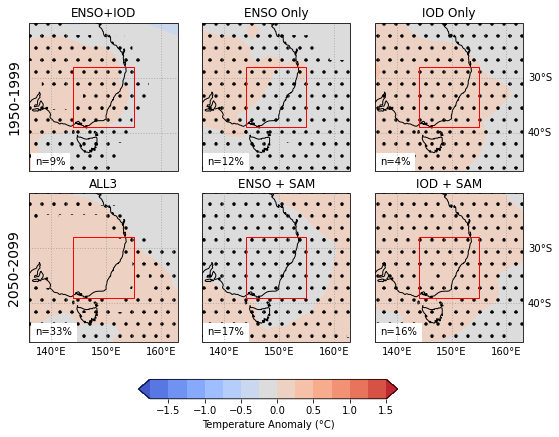

In [52]:
import matplotlib.cm as cm
import matplotlib.colorbar as cb
for iImpact in ['Rain','Temp']:
    nRows=2
    nCols=3

    fig=plt.figure(figsize=(nCols*3,nRows*4+1))

    #First row is years 1950 to 1999
    with allCompounds[indexSet+'winter'].sel(year=slice(1950,1999),fire='pos',drop=True) as firstRow:

        #First cell is ENSO+IOD
        ax=plt.subplot(nRows+1,nCols,1,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(firstRow,'enso+iod','winter',iImpact)
        ax.set_title('ENSO+IOD')
        gl.bottom_labels=False
        gl.right_labels=False

        #in the first column, put a y-label
        ax.text(
            -0.15, 0.5,  #xy relative to bottom left of axis
            str('1950-1999'), #yearRange
            rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
        )

        #2nd cell is ENSO only
        ax=plt.subplot(3,3,2,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(firstRow,'enso','winter',iImpact)
        ax.set_title('ENSO Only')
        gl.bottom_labels=False
        gl.right_labels=False

        #3rd cell is IOD only
        ax=plt.subplot(3,3,3,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(firstRow,'iod','winter',iImpact)
        ax.set_title('IOD Only')
        gl.bottom_labels=False

    #Second row is years 2050 to 2099
    with allCompounds[indexSet+'winter'].sel(year=slice(2050,2099),fire='pos',drop=True) as secondRow:
        #First cell is All3
        ax=plt.subplot(3,3,4,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(secondRow,'all3','winter',iImpact)
        ax.set_title('ALL3')
        gl.right_labels=False
        #in the first column, put a y-label
        ax.text(
            -0.15, 0.5,  #xy relative to bottom left of axis
            str('2050-2099'), #yearRange
            rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
        )

        #2nd cell is ENSO + SAM only
        ax=plt.subplot(3,3,5,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(secondRow,'enso+sam','winter',iImpact)
        ax.set_title('ENSO + SAM')
        gl.right_labels=False

        #3rd cell is IOD only
        ax=plt.subplot(3,3,6,projection=ccrs.PlateCarree())
        cs,gl = singleAnomWithStipling(secondRow,'iod+sam','winter',iImpact)
        ax.set_title('IOD + SAM')

    # add some space between rows
    plt.subplots_adjust(hspace=0.15, wspace=0.1)

    if iImpact=='Rain':
        label = 'Rainfall Anomaly (%)'
    elif iImpact=='Temp':
        label = ' Detrended Temperature Anomaly (°C)'
    
    #put a color bar on
    ax=fig.add_axes([0.3,0.3,0.4,0.03])
    cbar=plt.colorbar(
        cm.ScalarMappable(cs.norm,cs.cmap),
        orientation='horizontal', 
        cax=ax, 
        extend='both', 
        boundaries=cs.get_array(), 
        label=label
    )

    plt.savefig('figures/curatedImpactPlots/cmipDryWinter'+iImpact+'.pdf')

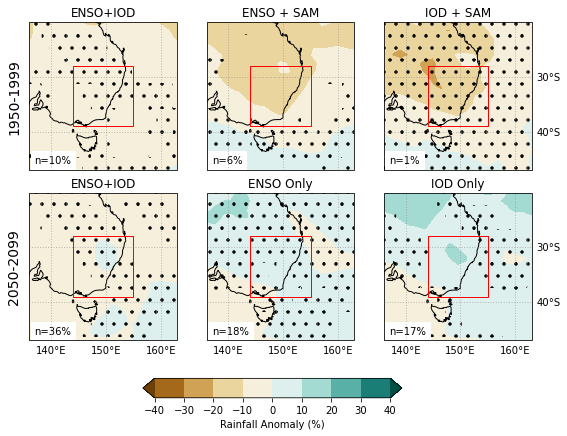

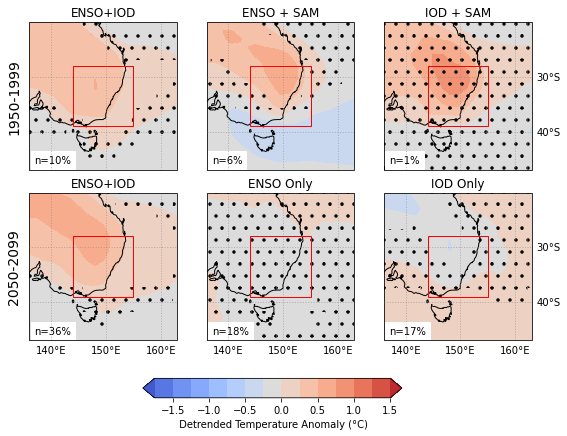

In [58]:
import matplotlib.cm as cm
import matplotlib.colorbar as cb
for iImpact in ['Rain','Temp']:

    nRows=2
    nCols=3
    fig=plt.figure(figsize=(nCols*3,nRows*4+1))

    #First row is years 1950 to 1999
    with allCompounds[indexSet+'summer'].sel(year=slice(1950,1999),fire='pos',drop=True) as firstRow:

        #First cell is ENSO+IOD
        ax=plt.subplot(nRows+1,nCols,1,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(firstRow,'enso+iod','summer',iImpact)
        ax.set_title('ENSO+IOD')
        gl.bottom_labels=False
        gl.right_labels=False

        #in the first column, put a y-label
        ax.text(
            -0.15, 0.5,  #xy relative to bottom left of axis
            str('1950-1999'), #yearRange
            rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
        )

        #2nd cell is ENSO only
        ax=plt.subplot(nRows+1,nCols,2,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(firstRow,'enso+sam','summer',iImpact)
        ax.set_title('ENSO + SAM')
        gl.bottom_labels=False
        gl.right_labels=False


        #3rd cell is IOD only
        ax=plt.subplot(nRows+1,nCols,3,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(firstRow,'iod+sam','summer',iImpact)
        ax.set_title('IOD + SAM')
        gl.bottom_labels=False


    #Second row is years 2050 to 2099
    with allCompounds[indexSet+'summer'].sel(year=slice(2050,2099),fire='pos',drop=True) as secondRow:
        #First cell is All3
        ax=plt.subplot(nRows+1,nCols,nCols+1,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(secondRow,'enso+iod','summer',iImpact)
        ax.set_title('ENSO+IOD')
        gl.right_labels=False


        #in the first column, put a y-label
        ax.text(
            -0.15, 0.5,  #xy relative to bottom left of axis
            str('2050-2099'), #yearRange
            rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
        )

        #2nd cell is ENSO + SAM only
        ax=plt.subplot(nRows+1,nCols,nCols+2,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(secondRow,'enso','summer',iImpact)
        ax.set_title('ENSO Only')
        gl.right_labels=False

        #3rd cell is IOD only
        ax=plt.subplot(nRows+1,nCols,nCols+3,projection=ccrs.PlateCarree())
        cs,gl= singleAnomWithStipling(secondRow,'iod','summer',iImpact)
        ax.set_title('IOD Only')

    # add some space between rows
    plt.subplots_adjust(hspace=0.15)

    if iImpact=='Rain':
        label = 'Rainfall Anomaly (%)'
    elif iImpact=='Temp':
        label = ' Detrended Temperature Anomaly (°C)'
    
    #put a color bar on
    ax=fig.add_axes([0.3,0.3,0.4,0.03])
    cbar=plt.colorbar(
        cm.ScalarMappable(cs.norm,cs.cmap),
        orientation='horizontal', 
        cax=ax, 
        extend='both', 
        boundaries=cs.get_array(), 
        label = label
    )

    plt.savefig('figures/curatedImpactPlots/cmipDrySummer'+iImpact+'.pdf')

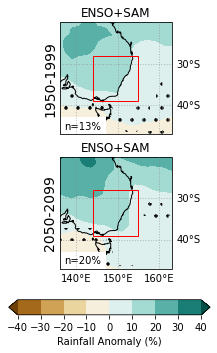

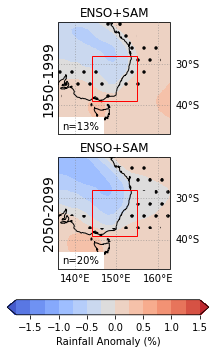

In [61]:
import matplotlib.cm as cm
import matplotlib.colorbar as cb

for iImpact in ['Rain','Temp']:

    fig=plt.figure(figsize=(7,7))

    #First row is years 1950 to 1999
    with allCompounds[indexSet+'summer'].sel(year=slice(1950,1999),fire='neg',drop=True) as firstRow:

        ax=plt.subplot(3,1,1,projection=ccrs.PlateCarree())
        cs,gl=singleAnomWithStipling(firstRow,'enso+sam','summer',iImpact)
        ax.set_title('ENSO+SAM')
        gl.bottom_labels=False

        #in the first column, put a y-label
        ax.text(
            -0.15, 0.5,  #xy relative to bottom left of axis
            str('1950-1999'), #yearRange
            rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
        )

    #Second row is years 2050 to 2099
    with allCompounds[indexSet+'summer'].sel(year=slice(2050,2099),fire='neg',drop=True) as secondRow:
        #First cell is All3
        ax=plt.subplot(3,1,2,projection=ccrs.PlateCarree())
        cs,gl=singleAnomWithStipling(secondRow,'enso+sam','summer',iImpact)
        ax.set_title('ENSO+SAM')

        #in the first column, put a y-label
        ax.text(
            -0.15, 0.5,  #xy relative to bottom left of axis
            str('2050-2099'), #yearRange
            rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
        )


    # add some space between rows
    plt.subplots_adjust(hspace=0.2)

    #put a color bar on
    ax=fig.add_axes([0.3,0.3,0.4,0.03])
    cbar=plt.colorbar(
        cm.ScalarMappable(cs.norm,cs.cmap),
        orientation='horizontal', 
        cax=ax, 
        extend='both', 
        boundaries=cs.get_array(), 
        label = 'Rainfall Anomaly (%)'
    )

    plt.savefig('figures/curatedImpactPlots/cmipWetSummer'+iImpact+'.pdf')